## TASK: Build a model that predicts whether a passenger on the   Titanic survived or not.

In [1]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt                       ## For plotting graphs
import seaborn as sns                                 ## Data Visualization Library
from sklearn.preprocessing import LabelEncoder        ## Convert categorical labels into numeric labels
from sklearn.preprocessing import StandardScaler      ## Library for standardizing the features (scaling)
from sklearn.metrics import classification_report,accuracy_score   
from sklearn.model_selection import train_test_split,GridSearchCV   ## Library for Hyperparamter Tuning using cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import RFE             ## Recursive Feature Elimination- Feature Selection Libaray
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
titanic=pd.read_csv('Titanic.csv') # Titanic.csv is read, titanic will contain original DataFrame

In [3]:
df = pd.DataFrame(titanic) # Creating a dataframe of the csv file, loaded in the titanic variable
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- The Minimum age of the passenger is around 1 years and the max age is 80 years.
- The Maximum sib and spouse are 8 and the max parent and children are 6, that concludes some large families are on the ship.
- The Highest Fare paid by a person is 512 dollars.

## Data Cleaning

In [6]:
# Remove all columns between 'Ticket' to 'Cabin(Included)'-- Ticket, Fare and Cabin is removed because not helpful for prediction
df.drop(df.loc[:,'Ticket':'Cabin'].columns, axis=1,inplace=True)

In [7]:
# Fill missing values for 'Age' with median and round up the age to whole numbers
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = np.ceil(df['Age']).astype(int)

In [8]:
# Fill missing 'Embarked' with the most common port
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [9]:
# Sorting according to the sequence of the port, according to place of occurrence 
category_order = ['S', 'C', 'Q']
df['Embarked'] = pd.Categorical(df['Embarked'], categories=category_order, ordered=True)
df = df.sort_values(by=['Embarked', 'Pclass','Sex'])

In [10]:
# Define a dictionary to map the old values to new values so we can see the name of the plot
values1 = {
    'S': 'Southampton',
    'Q': 'Queenstown',
    'C': 'Cherbourg',
}
df['Embarked'] = df['Embarked'].map(values1)

In [11]:
# Dropping the index from the dataset
df = df.reset_index(drop=True)

In [12]:
## Finding the number of missing values 
missing_values = df.isna().sum().sum()
print("Total Missing Values:", missing_values) # Count the total number of missing values 

Total Missing Values: 0


In [13]:
# Count the total number of duplicate values 
df.duplicated().sum()

0

### Feature Engineering
- The SibSp and Parch columns individually provide partial information about the passenger's family context. 
- By combining them, FamilySize offers a more holistic view, which helps in better understanding

In [14]:
## Creating a new feature 'FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [15]:
# List of columns
cols = df.columns.tolist()

# Find indices of 'SibSp' and 'Parch'
sibsp_index = cols.index('SibSp')
parch_index = cols.index('Parch')

# Move 'FamilySize' to be after 'Parch' and 'SibSp'
cols.insert(parch_index + 1, cols.pop(cols.index('FamilySize')))

# Reorder dataframe columns
df = df[cols]

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,FamilySize,Embarked
0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,2,Southampton
1,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,1,Southampton
2,62,1,1,"Icard, Miss. Amelie",female,38,0,0,1,Southampton
3,89,1,1,"Fortune, Miss. Mabel Helen",female,23,3,2,6,Southampton
4,137,1,1,"Newsom, Miss. Helen Monypeny",female,19,0,2,3,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,788,0,3,"Rice, Master. George Hugh",male,8,4,1,6,Queenstown
887,791,0,3,"Keane, Mr. Andrew ""Andy""",male,28,0,0,1,Queenstown
888,826,0,3,"Flynn, Mr. John",male,28,0,0,1,Queenstown
889,829,1,3,"McCormack, Mr. Thomas Joseph",male,28,0,0,1,Queenstown


In [17]:
# Saving the preprocessed dataset into a new csv file
file_path = "titanic output.csv"
df.to_csv(file_path, index=True)

## Exploratory Data Analysis (EDA)

### Assumption 1
- Assuming the whole family survived or not survived
- Assumming the whole family is in the same class and embarked from the same port location

The number of people in first class: 383
The number of people in second class: 328
The number of people in third class: 986


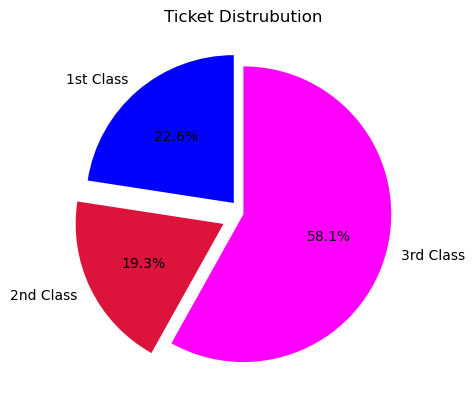

In [18]:
# Count the number of people (passenger + family members) who are in first class, second class and third class 
count_class1=0
count_class2=0
count_class3=0

for i in range(0,891):
    if (df["Pclass"][i]==(1)):
        count_class1=count_class1+int(df['FamilySize'][i])
    elif (df["Pclass"][i]==(2) ):
        count_class2=count_class2+int(df['FamilySize'][i])
    elif (df["Pclass"][i]==(3) ):
        count_class3=count_class3+int(df['FamilySize'][i])
        
print("The number of people in first class:",count_class1)
print("The number of people in second class:",count_class2) 
print("The number of people in third class:",count_class3)

# Plotting a pie graph, for ticket distrubution amongst the classes
color = ("blue", "crimson", "magenta")
label=("1st Class","2nd Class","3rd Class")
explod = (0.1, 0.15, 0.0)
pclass =df.groupby('Pclass')['FamilySize'].sum()     ## Grouping the families according to their ticket class
plt.pie(pclass, startangle=90,colors=color,labels=label,explode=explod,autopct='%1.1f%%')
plt.title("Ticket Distrubution")
plt.show()

#### Observation
- 22.6% Passenger Families belong to first class
- 19.3% Passenger Families belong to second class
- 58.1% Passenger Families belong to third class

In [19]:
#Finding how many people from each class survived and not survied
survival_countsC = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)       # Groupby 'Class' and 'Survived' 
family_survival_countsC = df[df['Survived'] == 1].groupby('Pclass')['FamilySize'].sum()  # Finding how many families survived
family_not_survival_countsC = df[df['Survived'] == 0].groupby('Pclass')['FamilySize'].sum() # Finding how many families did not survived

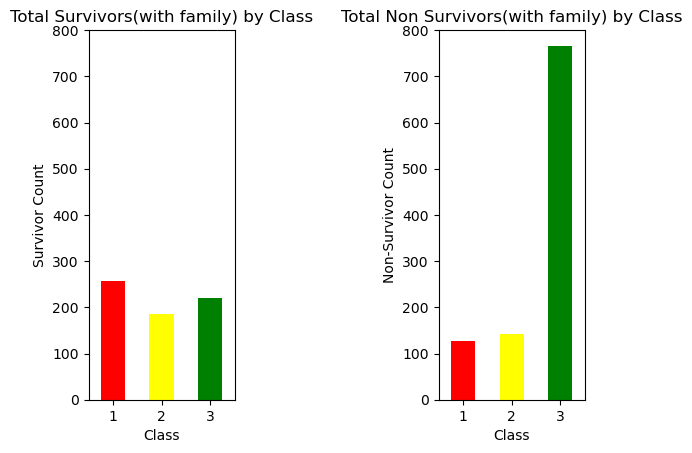

In [20]:
## Bar plot for survival and non-survival from each class

plt.subplot(1,3,1)
family_survival_countsC.plot(kind='bar', color=["red","yellow","green"])
plt.title('Total Survivors(with family) by Class',size=12)
plt.xlabel('Class')
plt.ylabel('Survivor Count')
plt.xticks(rotation=0)
plt.ylim(0, 800)

plt.subplot(1,3,3)
family_not_survival_countsC.plot(kind='bar', color=["red","yellow","green"])
plt.title('Total Non Survivors(with family) by Class',size=12)
plt.xlabel('Class')
plt.ylabel('Non-Survivor Count')
plt.xticks(rotation=0)
plt.ylim(0, 800)

plt.show()

#### Observations:
- The maximum survivors belonged to 1st class ticket (250)
- The maximum non-survivors belonged to 3rd class ticket (750+), hence the poor suffered alot

The number of people who embarked on Port Southamptom: 1280
The number of people who embarked on Port Cherbourg: 294
The number of people who embarked on Port Queenstown: 123
The number of people who embarked the ship: 1697


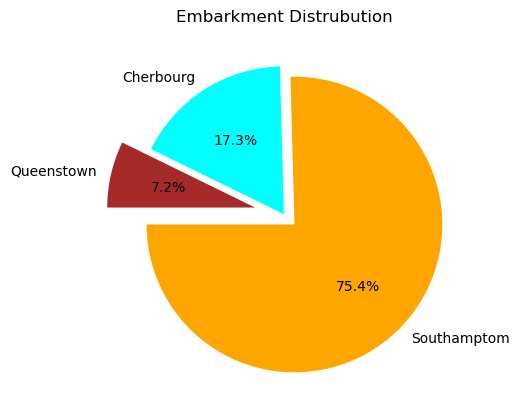

In [21]:
# Counting the number of people (passenger + family members) embarking from different ports
count_portS=0
count_portC=0
count_portQ=0
for i in range(0,891):
    if (df["Embarked"][i]==("Southampton")):
        count_portS=count_portS+int(df['FamilySize'][i])
    elif (df["Embarked"][i]==("Cherbourg") ):
        count_portC=count_portC+int(df['FamilySize'][i])
    elif (df["Embarked"][i]==("Queenstown") ):
        count_portQ=count_portQ+int(df['FamilySize'][i])
print("The number of people who embarked on Port Southamptom:",count_portS)
print("The number of people who embarked on Port Cherbourg:",count_portC) 
print("The number of people who embarked on Port Queenstown:",count_portQ)
print("The number of people who embarked the ship:",count_portS+count_portC+count_portQ)

# Plotting a pie graph, for Embarkment distrubution
color = ("orange", "cyan", "brown")
label=("Southamptom","Cherbourg","Queenstown")
explod = (0.1, 0.0, 0.2)
Embarkment =df.groupby('Embarked')['FamilySize'].sum()
plt.pie(Embarkment, startangle=180,colors=color,labels=label,explode=explod,autopct='%1.1f%%')
plt.title("Embarkment Distrubution")
plt.show()

#### Observations:
- 17.3% Passenger Families embarked from Cherbourg
- 7.2% Passenger Families embarked from Queenstown
- 75.4% Passenger Families embarked from Southampton

In [22]:
# Finding how many people from each embarkment port survived
survival_countsP = df.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0) # Group by 'Embarked' and 'Survived'
family_survival_countsP = df[df['Survived'] == 1].groupby('Embarked')['FamilySize'].sum()
family_not_survival_countsP = df[df['Survived'] == 0].groupby('Embarked')['FamilySize'].sum()

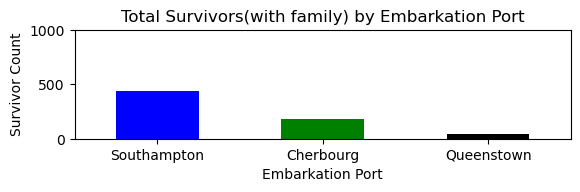

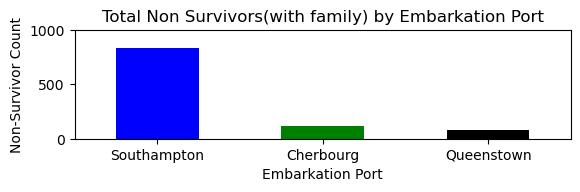

In [23]:
# Bar plot for survival and non-survival from each Embarkation Port

plt.subplot(3,1,1)
family_survival_countsP.plot(kind='bar', color=["blue","green","black"])
plt.title('Total Survivors(with family) by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survivor Count')
plt.xticks(rotation=0)
plt.ylim(0,1000)
plt.show()

plt.subplot(3,1,3)
family_not_survival_countsP.plot(kind='bar', color=["blue","green","black"])
plt.title('Total Non Survivors(with family) by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Non-Survivor Count')
plt.xticks(rotation=0)
plt.ylim(0, 1000)

plt.show()

#### Observations:
- Maximum people embarked from Southamptom, and therby max to survive and not survive both belonged to Southampton

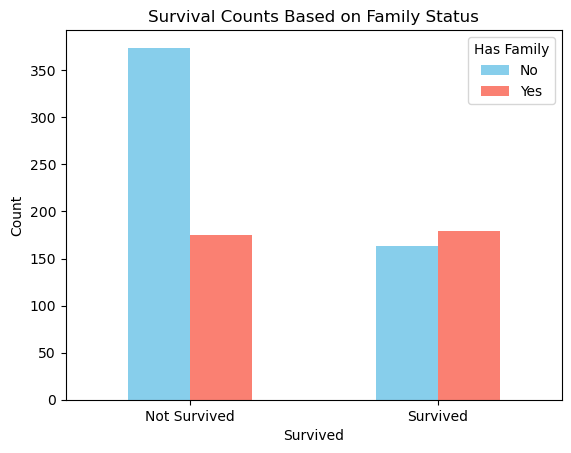

In [24]:
# Feature Engineering (Adding a Boolean column)
df['HasFamily'] = (df['SibSp'] + df['Parch']) > 0  # Create a new column indicating whether the passenger had family or not

survival_counts = df.groupby(['Survived', 'HasFamily']).size().unstack(fill_value=0) # Group the data by 'Survived' and 'HasFamily' 
survival_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

# Plotting a graph for better Visualization
plt.title('Survival Counts Based on Family Status')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)
plt.legend(title='Has Family', labels=['No', 'Yes'])
plt.show()

#### Observations:
- The graph is trying to signify, if there is a relation between having a family and chances of surviving
- There is a slight relation, that slightly more passengers survived if they had a family and their chance of not surving was more, if they had no family

### Assumption 2
- Ignoring the families and considering only the individual passengers, as we have insufficient information about the family member's survival

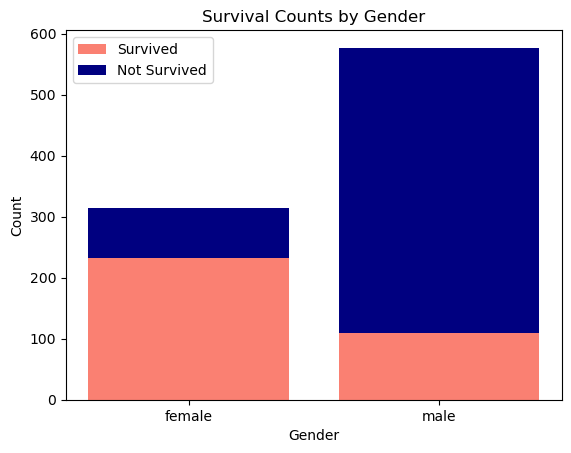

In [25]:
# Creating a dataframe for survival counts
Survived = df['Survived'].value_counts().reset_index()
Survived_male_female = df.groupby('Sex')['Survived'].value_counts().reset_index()

# Filtering the dataframe on the basis of survival
survivors = Survived_male_female[Survived_male_female['Survived'] == 1]
non_survivors = Survived_male_female[Survived_male_female['Survived'] == 0]

# Plotting the stacked bar chart for survival counts by gender
plt.bar(survivors['Sex'], survivors['count'], color='salmon', label='Survived')
plt.bar(non_survivors['Sex'], non_survivors['count'], bottom=survivors['count'], color='navy', label='Not Survived')
plt.title('Survival Counts by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()

plt.show()

#### Observations:
- Female Survived= 233, Not survived=81
- Male  Survived =109, Not Survived=468
- Survived Total=233+109=341
- Not Survived=81+468=549

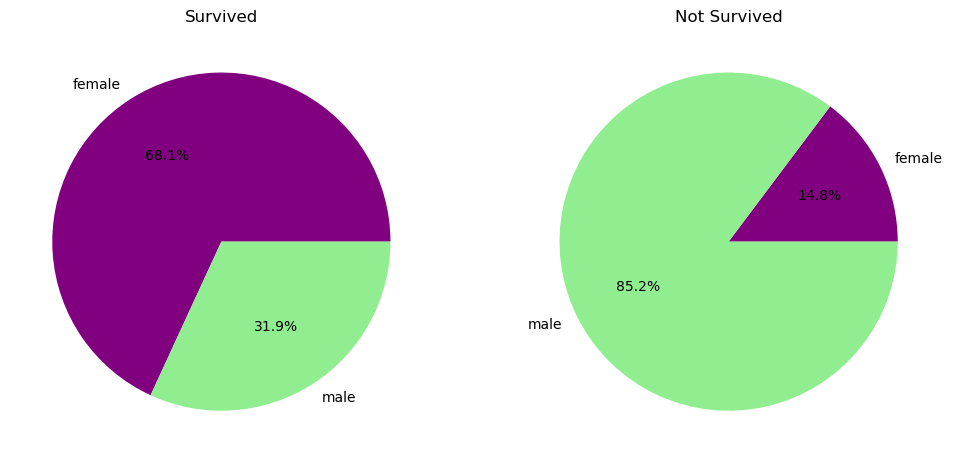

In [26]:
# For even better Vizualization, converting stacked plots into pie charts

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for survived males and females
axs[0].pie(survivors['count'], labels=survivors['Sex'], autopct='%1.1f%%', colors=['purple', 'lightgreen'])
axs[0].set_title('Survived')

# Pie chart for not survived males and females
axs[1].pie(non_survivors['count'], labels=non_survivors['Sex'], autopct='%1.1f%%', colors=['purple', 'lightgreen'])
axs[1].set_title('Not Survived')

plt.show()

## Binary Classification - using Logistic Regression

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'FamilySize', 'Embarked', 'HasFamily'],
      dtype='object')

In [28]:
df.drop(columns=['PassengerId','Name','HasFamily'],inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Embarked
0,1,1,female,35,1,0,2,Southampton
1,1,1,female,58,0,0,1,Southampton
2,1,1,female,38,0,0,1,Southampton
3,1,1,female,23,3,2,6,Southampton
4,1,1,female,19,0,2,3,Southampton
...,...,...,...,...,...,...,...,...
886,0,3,male,8,4,1,6,Queenstown
887,0,3,male,28,0,0,1,Queenstown
888,0,3,male,28,0,0,1,Queenstown
889,1,3,male,28,0,0,1,Queenstown


#### Reasons:
- The PassengerId column is a unique identifier. It doesn't carry any information that could help predict whether a passenger survived or not.
- The Name column contains text data, which can be complex to process 
- The HasFamily column likely indicates whether a passenger has family members aboard, which is information already captured more precisely by the FamilySize feature.

In [29]:
# Converting the categorial data into numerical values-- Using Encoding
# Southamptom 0, Cherbourg 1, Queenstown 2 (specific order required)
order_embarked = ["Southampton", "Cherbourg", "Queenstown"]
df['Embarked'] = pd.Categorical(df['Embarked'], categories=order_embarked, ordered=True)
df['Embarked'] = df['Embarked'].cat.codes

In [30]:
# Female 0 Male 1 (specific order not required)
label_encoder_sex = LabelEncoder()
df['Sex'] = label_encoder_sex.fit_transform(df['Sex'])

<Axes: >

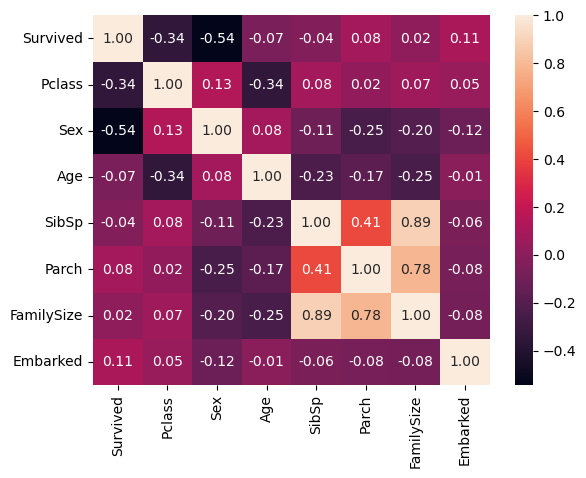

In [31]:
sns.heatmap(df.corr(), annot=True,fmt=".2f")

#### Observations:
- There is a strong negative correlation (-0.54) with the Sex feature, indicating that females were more likely to survive than males (female = 0 & male = 1).

- There is a moderate negative correlation (-0.34) with Pclass, suggesting that passengers in higher classes (1st class) were more likely to survive.

- A weak negative correlation (-0.07) with Age, indicating that younger passengers might have had slightly better chances of survival.
- A very weak positive correlation (0.02) with FamilySize, implying that having a larger family size did not significantly impact survival.
- A weak positive correlation (0.11) with Embarked, suggesting some variations in survival rates based on the port of embarkation.
- The strong correlations between Family Size and SibSp/Parch is because, Family size is a derived feature

In [32]:
X=df.drop(columns="Survived",axis=1)
features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch','FamilySize','Embarked']
X

,Pclass,Sex,Age,SibSp,Parch,FamilySize,Embarked
0,1,0,35,1,0,2,0
1,1,0,58,0,0,1,0
2,1,0,38,0,0,1,0
3,1,0,23,3,2,6,0
4,1,0,19,0,2,3,0
...,...,...,...,...,...,...,...
886,3,1,8,4,1,6,2
887,3,1,28,0,0,1,2
888,3,1,28,0,0,1,2
889,3,1,28,0,0,1,2


In [33]:
Y=df["Survived"]
Y

0      1
1      1
2      1
3      1
4      1
      ..
886    0
887    0
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## Without Feature Selection

In [34]:
# Standardize the features to have mean 0 and variance 1
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
# Split the data into training (80%) and temporary (20%) sets
X_train, x_temp, Y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=42) # Random_state Controls the shuffling

# Split the temporary set into validation (10%) and test (10%) sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50)

In [36]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of Y_train is: ' + str(Y_train.shape))
print ('We have m = %d training examples' % (len(Y_train)))

The shape of X_train is: (712, 7)
The shape of Y_train is: (712,)
We have m = 712 training examples


In [37]:
print ('The shape of x_test is: ' + str(x_test.shape))
print ('The shape of y_test is: ' + str(y_test.shape))
print ('We have n = %d testing examples' % (len(y_test)))

The shape of x_test is: (90, 7)
The shape of y_test is: (90,)
We have n = 90 testing examples


In [38]:
# C:controls the regularization strength in LR.
# It also determines the trade-off between fitting the training data and avoiding overfitting.

LRmodel=LogisticRegression(max_iter=1000,C=0.1) # C is smaller for stronger Regularization

In [39]:
LRmodel.fit(X_train,Y_train)

LogisticRegression(C=0.1, max_iter=1000)

In [40]:
y_pred = LRmodel.predict(x_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [41]:
y_test.values

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [42]:
y_test.value_counts()

Survived
0    56
1    34
Name: count, dtype: int64

In [43]:
# Evaluating the accuracy for the Logistic Regression model on the test set
accuracy_score(y_test,y_pred)

0.8222222222222222

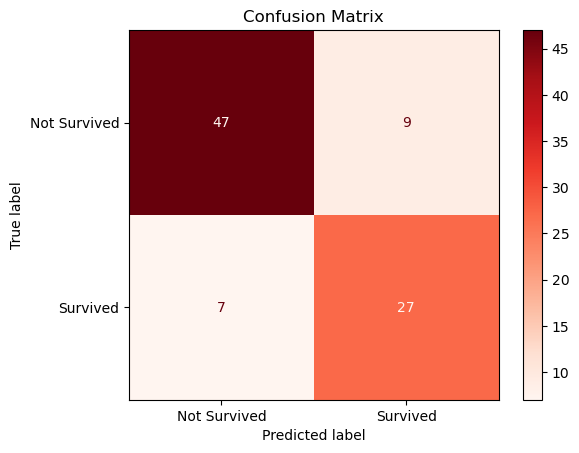

In [44]:
# Confusion Matrix:
# array([[TP, FP],
#       [FN, TN]]

cm = confusion_matrix(y_test, y_pred, labels=LRmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

#### Observations:
- The passengsers who actually survived and where predicted to survive are in the top left
- The passengsers who actually did not survive and where predicted to not survive are in the bottom right

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        56
           1       0.75      0.79      0.77        34

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.82      0.82        90



#### Insights:
- Precision: Measures the proportion of positive predictions that are actually correct. TP/(TP+FP)
- Recall: Represents the ability of the model to identify all positive cases.TP/(TP+FN)
- F1-score: A harmonic mean of precision and recall

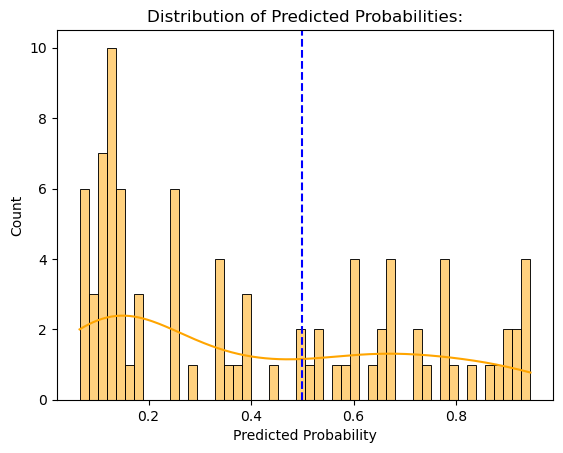

In [46]:
# Predict probabilities
y_probs = LRmodel.predict_proba(x_test)[:, 1]

# Probability Distribution Plot
sns.histplot(y_probs, bins=50, kde=True, color='orange')
plt.axvline(0.5, color='blue', linestyle='--')
plt.xlabel('Predicted Probability')
plt.title('Distribution of Predicted Probabilities:')
plt.show()

#### Observations:
- The histogram shows a wide range of predicted probabilities, with counts of predictions distributed across the entire probability spectrum from 0 to 1.

- There are notable peaks at lower probabilities (around 0.1) and higher probabilities (around 0.8), suggesting that the model is making strong predictions in many cases.

- The distribution shows that the model is often confident in its predictions, as evidenced by the peaks at lower and higher probabilities.

## With Feature Selection and Removing the Outliers

In [47]:
# Feature selection using RFE with Logistic Regression
rfe = RFE(LRmodel, n_features_to_select=5)
rfe.fit(X, Y)
selected_features = [features[i] for i in range(len(features)) if rfe.support_[i]]
print('Selected features:', selected_features)

Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked']


In [48]:
# Remove outliers using the IQR method
Q1 = df[selected_features].quantile(0.25) # Calculate 1st quartile
Q3 = df[selected_features].quantile(0.75) # Calculate 3rd quartile
IQR = Q3 - Q1 # Calculate interquartile range
df_out = df[~((df[selected_features] < (Q1 - 1.5 * IQR)) | (df[selected_features] > (Q3 + 1.5 * IQR))).any(axis=1)] # Filter out outliers

In [49]:
# Update X to include only the selected features
X = df_out[selected_features]
X = scaler.fit_transform(X)
Y = df_out['Survived']

### Implementeing Binary Classification using different model

In [50]:
# Split the data into training (80%) and temporary (20%) sets
X_train, x_temp, Y_train, y_temp = train_test_split(X, Y, test_size=0.20, random_state=42)

# Split the temporary set into validation (10%) and test (10%) sets
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50)

In [51]:
# Define the models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [52]:
# Train the models and evaluate accuracy using the testing set and cross validation set
accuracy_scores = {}
accuracy_cv_scores={}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on the test set and cross validation set
    y_pred = model.predict(x_test)
    y_val_pred = model.predict(x_val)
    
    # Calculate accuracy on test set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    
    # Calculate accuracy on CV set
    accuracy_cv = accuracy_score(y_val, y_val_pred)
    accuracy_cv_scores[model_name] = accuracy_cv
    
# Display the accuracy scores
for model_name, accuracy in accuracy_scores.items():
    print(f'Test Set Accuarcy of {model_name}: {accuracy:.4f}')
    
print()
    
for model_name, accuracy_cv in accuracy_cv_scores.items():
    print(f'CV Set Accuarcy of {model_name}: {accuracy_cv:.4f}')

Test Set Accuarcy of RandomForest: 0.8734
Test Set Accuarcy of LogisticRegression: 0.8101
Test Set Accuarcy of GradientBoosting: 0.8608

CV Set Accuarcy of RandomForest: 0.7848
CV Set Accuarcy of LogisticRegression: 0.7848
CV Set Accuarcy of GradientBoosting: 0.8481


In [53]:
# Evaluate the best model on the test set

best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
y_test_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Best Model: {best_model_name}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Best Model: RandomForest
Test Accuracy: 0.8734


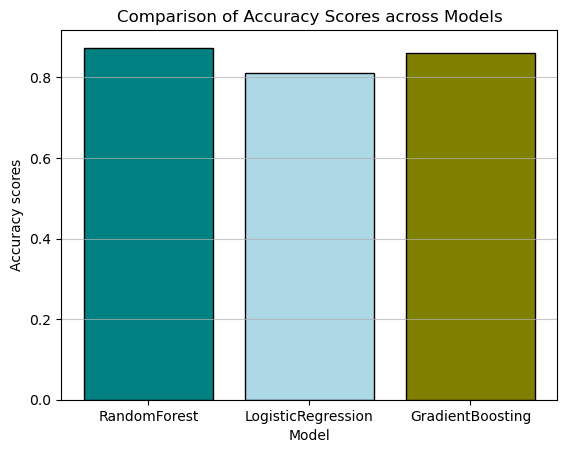

In [54]:
## Comparing the test set accuracies using bas plot
colors=["teal","lightblue","olive"]
plt.bar(accuracy_scores.keys(),accuracy_scores.values(), color=colors,edgecolor='black')
plt.xlabel('Model')
plt.ylabel('Accuracy scores')
plt.title('Comparison of Accuracy Scores across Models')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.show()

In [55]:
## Testing the model on an example
model_testing_data = {'Pclass': [2], 'Sex': [1],'Age':[34],'SibSp': [2], 'Embarked': [2]}
mtdf = pd.DataFrame(model_testing_data)

In [56]:
# Prediction using best model
predicted_survival = best_model.predict(mtdf)

# Display the predicted rating
print("Predicted Survival:", predicted_survival[0])

Predicted Survival: 0


C:\Users\Asus\New folder\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


#### Insights:
- If 0 will not survive
- If 1 will survive 

## Fine Tuning the Model- Hyperparameter Optimization

In [57]:
# Define parameter grids for each model
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

In [58]:
# Initialize GridSearchCV for each model
##5-Fold Cross-Validation (cv=5)
## accuracy is used for scoring as it looks at correctly classified observations both positive and negative.
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy')
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')

In [59]:
# Fit the models
grid_lr.fit(X_train, Y_train)
grid_rf.fit(X_train, Y_train)
grid_gb.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [60]:
# Get the best models
best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_

In [61]:
# Evaluate the best models
models = {
    'Logistic Regression': best_lr,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb
}

for name, model in models.items():
    y_val_pred = model.predict(x_val)
    acc = accuracy_score(y_val, y_val_pred)
    print(f'{name} -Cross Validation Accuracy: {acc:.2f}')

Logistic Regression -Cross Validation Accuracy: 0.78
Random Forest -Cross Validation Accuracy: 0.84
Gradient Boosting -Cross Validation Accuracy: 0.82
